In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5],
        scale_hyperparameter = False))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 50
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

C:\Users\tcumi\github_repo\neural-network\python\ga.py:189: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


finish training
Checkpoint 50, Accuracy: 0.7407407407407407, Loss: 0.6234962322093822
finish training
Checkpoint 100, Accuracy: 0.7870370370370371, Loss: 0.5878336517899124
finish training
Checkpoint 150, Accuracy: 0.7870370370370371, Loss: 0.5889261033799913
finish training
Checkpoint 200, Accuracy: 0.7962962962962963, Loss: 0.5826265900223343
finish training
Checkpoint 250, Accuracy: 0.7962962962962963, Loss: 0.5803355817441587
finish training
Checkpoint 300, Accuracy: 0.8055555555555556, Loss: 0.5873647619176794
finish training
Checkpoint 350, Accuracy: 0.7962962962962963, Loss: 0.5870196024576823


C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


finish training
Checkpoint 400, Accuracy: 0.8055555555555556, Loss: 0.5850264937789352
finish training
Checkpoint 450, Accuracy: 0.8055555555555556, Loss: 0.5851621981020327
finish training
Checkpoint 500, Accuracy: 0.7962962962962963, Loss: 0.5805076316550926


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None:
        title = '{} VS {}'.format(x_label, y_label)
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

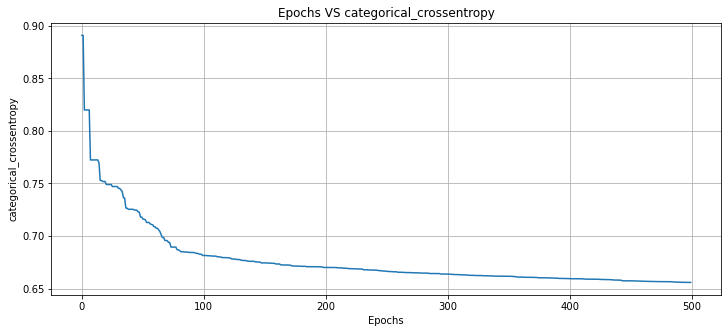

In [10]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.9280927 ]
 [0.04621243]
 [0.0256948 ]]
[1. 0. 0.] <-> [[0.8921915 ]
 [0.07224873]
 [0.03555968]]
[1. 0. 0.] <-> [[0.8766632 ]
 [0.08203937]
 [0.04129737]]
[1. 0. 0.] <-> [[0.51913375]
 [0.25355265]
 [0.2273136 ]]
[0. 1. 0.] <-> [[0.44119132]
 [0.30535427]
 [0.2534544 ]]
[1. 0. 0.] <-> [[0.47478104]
 [0.28080502]
 [0.24441394]]
[0. 0. 1.] <-> [[0.90245736]
 [0.06526197]
 [0.03228077]]
[0. 0. 1.] <-> [[0.05102206]
 [0.44002506]
 [0.5089529 ]]
[1. 0. 0.] <-> [[0.48663792]
 [0.27292094]
 [0.2404411 ]]
[1. 0. 0.] <-> [[0.9022832 ]
 [0.06538359]
 [0.03233325]]
[0. 1. 0.] <-> [[0.49611822]
 [0.2669145 ]
 [0.23696724]]
[1. 0. 0.] <-> [[0.90939736]
 [0.06031542]
 [0.03028718]]
[0. 1. 0.] <-> [[0.45184347]
 [0.2972185 ]
 [0.250938  ]]
[1. 0. 0.] <-> [[0.8985514 ]
 [0.06796258]
 [0.03348612]]
[1. 0. 0.] <-> [[0.3654295 ]
 [0.37102368]
 [0.26354682]]
[1. 0. 0.] <-> [[0.89289474]
 [0.07178091]
 [0.03532432]]
[1. 0. 0.] <-> [[0.9096014 ]
 [0.0601671 ]
 [0.03023151]]
[0. 0. 1.] <->

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


In [16]:
# Testing Performance

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.7407407407407407, 'mean_square_error': 2.9168134665304684, 'essential_metrics': {0: {'tp_hit': 72, 'fp_hit': 10, 'tn_hit': 18, 'fn_hit': 8}, 1: {'tp_hit': 8, 'fp_hit': 18, 'tn_hit': 75, 'fn_hit': 7}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 13}}, 'categorical_crossentropy': 0.6234962322093822, 'checkpoint': 50} 


{'accuracy': 0.7870370370370371, 'mean_square_error': 2.824208818191081, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'categorical_crossentropy': 0.5878336517899124, 'checkpoint': 100} 


{'accuracy': 0.7870370370370371, 'mean_square_error': 2.854570021775805, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'categorical_crossentropy': 0.5889261033

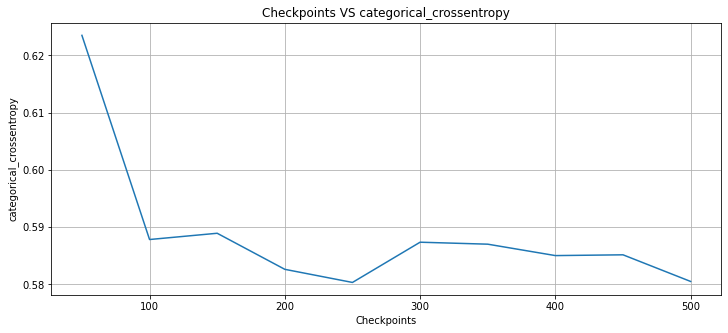

In [13]:
cat_cross = [ ckp[model.loss_fn] for ckp in checkpoints ]
draw_plot(x = [(i+1)*breakpoint for i in range(len(checkpoints))], y_list = [cat_cross], x_label = 'Checkpoints', \
    y_label = model.loss_fn)

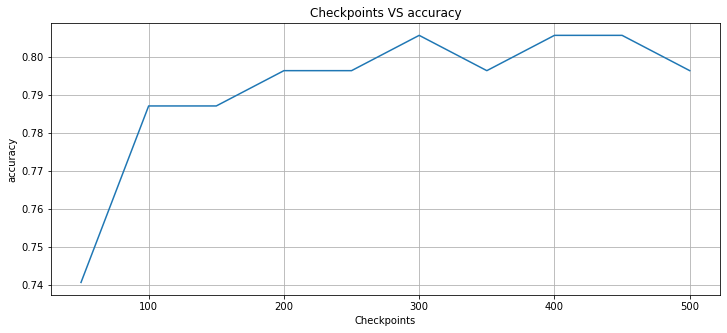

In [14]:
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [(i+1)*breakpoint for i in range(len(checkpoints))], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[[-0.80646574]
 [-2.9327369 ]
 [ 1.69136   ]
 [ 1.0233774 ]
 [ 2.082678  ]]
 bias: [-2.4869204]

Neuron 1: weights:
[[-0.42216462]
 [-1.9143114 ]
 [-0.64849854]
 [ 0.06990849]
 [ 0.8205693 ]]
 bias: [3.]

Neuron 2: weights:
[[-3.       ]
 [-3.       ]
 [-1.4193997]
 [-2.860833 ]
 [-2.7915301]]
 bias: [-2.6884909]

Neuron 3: weights:
[[-0.565758  ]
 [ 1.0394194 ]
 [ 0.58430064]
 [-2.3171163 ]
 [ 1.5989522 ]]
 bias: [2.167119]

$
Layer 2
Neuron 0: weights:
[[-3.        ]
 [-0.7918242 ]
 [-0.19643426]
 [-2.6531703 ]]
 bias: [1.4316479]

Neuron 1: weights:
[[-0.43955982]
 [-1.7865803 ]
 [-1.6423582 ]
 [ 1.0552363 ]]
 bias: [-1.9486927]

Neuron 2: weights:
[[ 3.        ]
 [ 0.34232026]
 [-2.2368793 ]
 [-0.82710326]]
 bias: [-2.6541283]

$

